# Using Napari-SpatialData 

This tutorial shows how to load SpatialData objects into the Napari-Spatialdata plugin, and use it with the "View" and "Scatter" widgets for visualising coordinates.

## Import packages and data

There are two options to install napari-spatialdata:

(1) Run `pip install napari-spatialdata`

or, 

(2) Clone this [repo](https://github.com/scverse/napari-spatialdata) and run `pip install -e .`


After installing napari-spatialdata, insert the file path of the dataset in the <em>FILE_PATH</em> variable below and execute the cell. This loads the dataset from the filepath and creates  a {class}`spatialdata.SpatialData` object. We'll use this object with the class `Interactive` to visualise this dataset in Napari.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from napari_spatialdata import Interactive
from spatialdata import SpatialData

plt.rcParams['figure.figsize'] = (20, 20)

FILE_PATH = "../../../data/cosmx/data.zarr" # Change this
sdata = SpatialData.read(FILE_PATH)

/opt/homebrew/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/rahulbshrestha/projects/spatialdata/src/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/opt/homebrew/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Visualise in napari

We can instantiate the `Interactive` class with our {class}`spatialdata.SpatialData` object, and view it in Napari.

In [16]:
interactive = Interactive(sdata)
interactive.run()

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:107: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-05-02 21:54:40.663 | INFO     | napari_spatialdata._categoricals_utils:_set_default_colors_for_categorical_obs:363 - the obs value 'Width' has more than 103 categories. Uniform 'grey' color will be used for all categories.
2023-05-02 22:02:12.881 | INFO     | napari_spatialdata._scatterwidgets:plot:253 - Plotting coordinates.
2023-05-02 22:02:20.842 | INFO     | 

This executes an empty Napari viewer. The SpatialData widget is in the bottom left hand corner and consists of two boxes, "Coordinate System" and "Elements". 

A {class}`spatialdata.SpatialData` object groups together five {obj}`spatialdata.models.SpatialElement`: Images (raster images), Labels (e.g. segmentation masks), Points (e.g. transcripts locations, molecular probes), Shapes (regions of interests, array capture locations etc.), and Table (where the molecular profiles and annotations are stored). Each SpatialElement can be associated with a coordinate system and the transformation required to align that element to it.

(-0.5, 2939.5, 1665.5, -0.5)

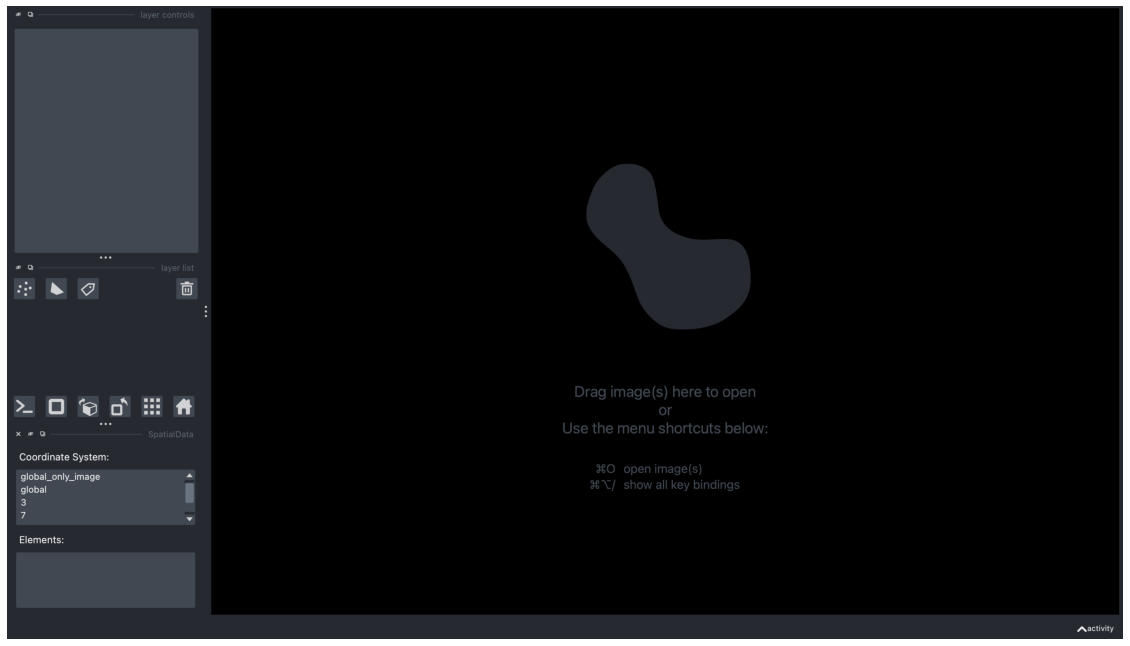

In [3]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We can pick a coordinate system in the first box. This automatically updates the next box, which shows the elements associated with that coordinate system. Clicking on an element loads it as a layer into Napari.

In the example below, we selected the coordinate system "16" and loaded "16_image" and "16_labels" to the Napari viewer.

(-0.5, 2939.5, 1665.5, -0.5)

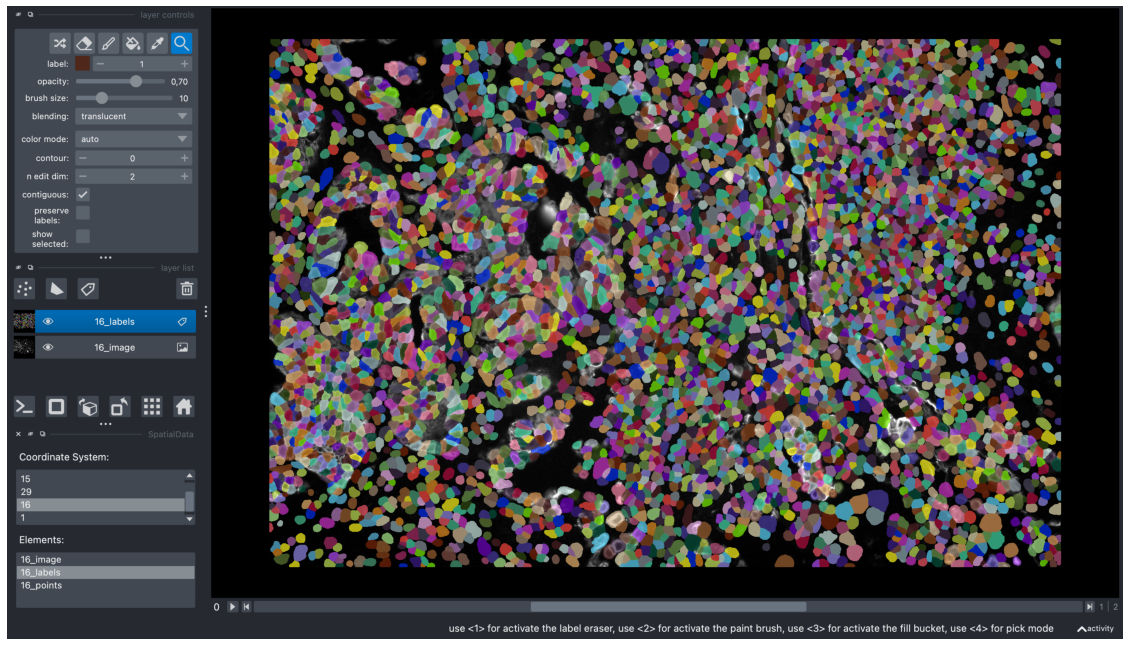

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-04-18 11:19:42.067 | INFO     | napari_spatialdata._view:_on_layer_update:204 - Updating layer.
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-04-18 11:19:42.081 | INFO     | napari_spatialdata._view:_on_layer_update:204 - Updating layer.
2023-04-18 11:19:43.090 | INFO     | napari_spatialdata._view:_on_layer_update:204 - Updating layer.
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatia

In [6]:
plt.imshow(interactive.screenshot())
plt.axis('off')

## Load axis with the view widget

Napari-SpatialData also comes with a "View" widget that can be used to load <em>obs</em>, <em>var</em> or <em>obsm</em>.

To open it, we can use the menu bar by going to Plugins > napari-spatialdata > View. The <em>obs</em>, <em>var</em> and <em>obsm</em> values associated with the anndata of the selected layer is shown.

To further examine a specific value, we can double click on any element on the View Widget to load it to the viewer. In the example below, we selected the layer "16_labels" and double clicked on the gene expression, "AATK" in the view widget.

(-0.5, 2939.5, 1857.5, -0.5)

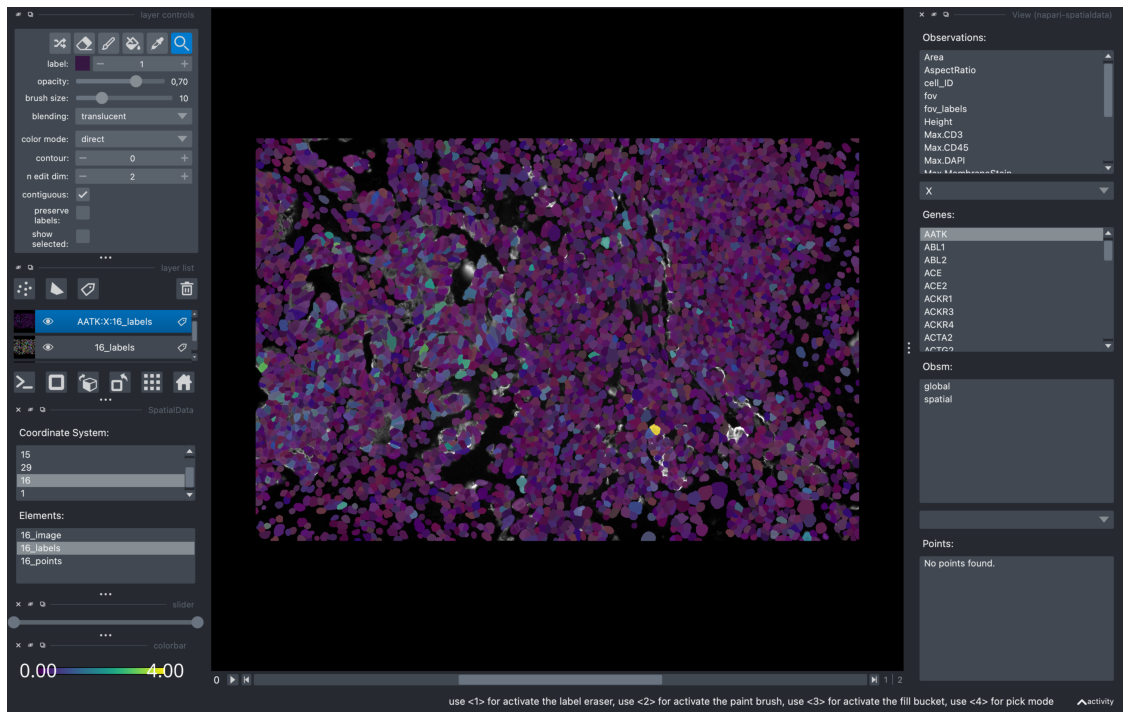

In [7]:
plt.imshow(interactive.screenshot())
plt.axis('off')

## Load axis into scatter widget

Napari-SpatialData also comes with a Scatter widget to visualise points in 2D coordinates.


In the example below, we started again with a setup where we've loaded 16_labels and 16_image to the viewer. Then, we can open the Scatter widget by going to Plugins > napari-spatialdata > Scatter.

(-0.5, 2939.5, 1665.5, -0.5)

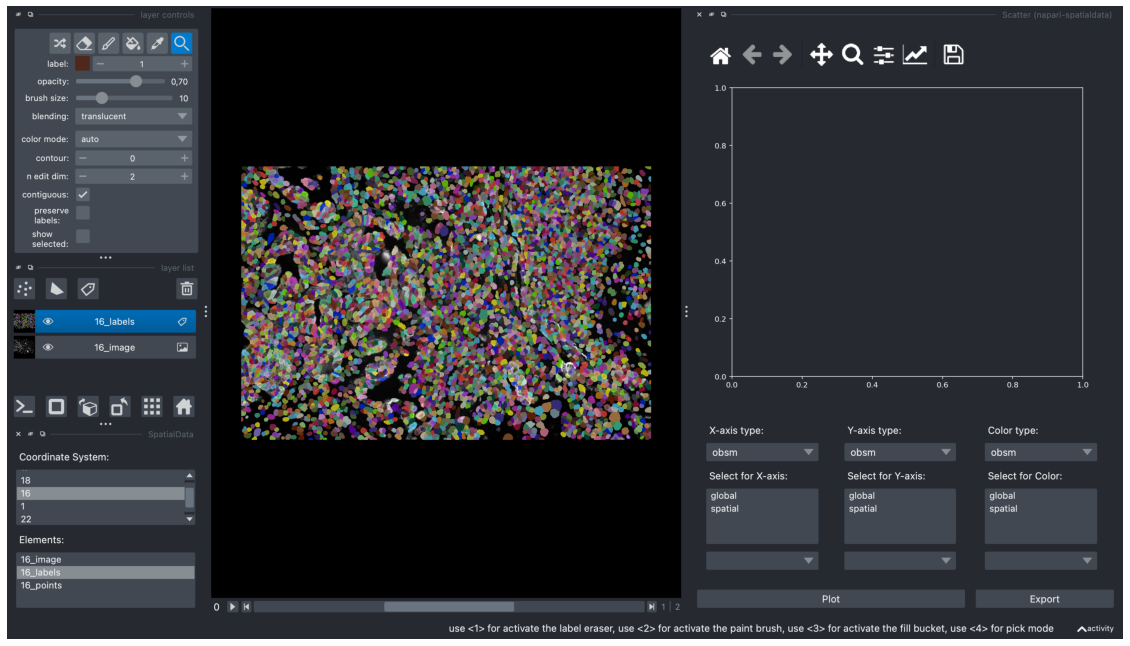

2023-04-18 11:23:16.698 | INFO     | napari_spatialdata._scatterwidgets:plot:253 - Plotting coordinates.


In [3]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We can now pick AnnData values to visualise in the scatterplot. 

In the example below, we've selected <em>obsm["global"] </em>, with axis 0 in the x-axis and axis 1 in the y-axis. We're coloring each coordinate by <em>obs["Area"] </em>. Once we've selected the relevant data points, clicking on "Plot" generates a scatterplot.

(-0.5, 2939.5, 1665.5, -0.5)

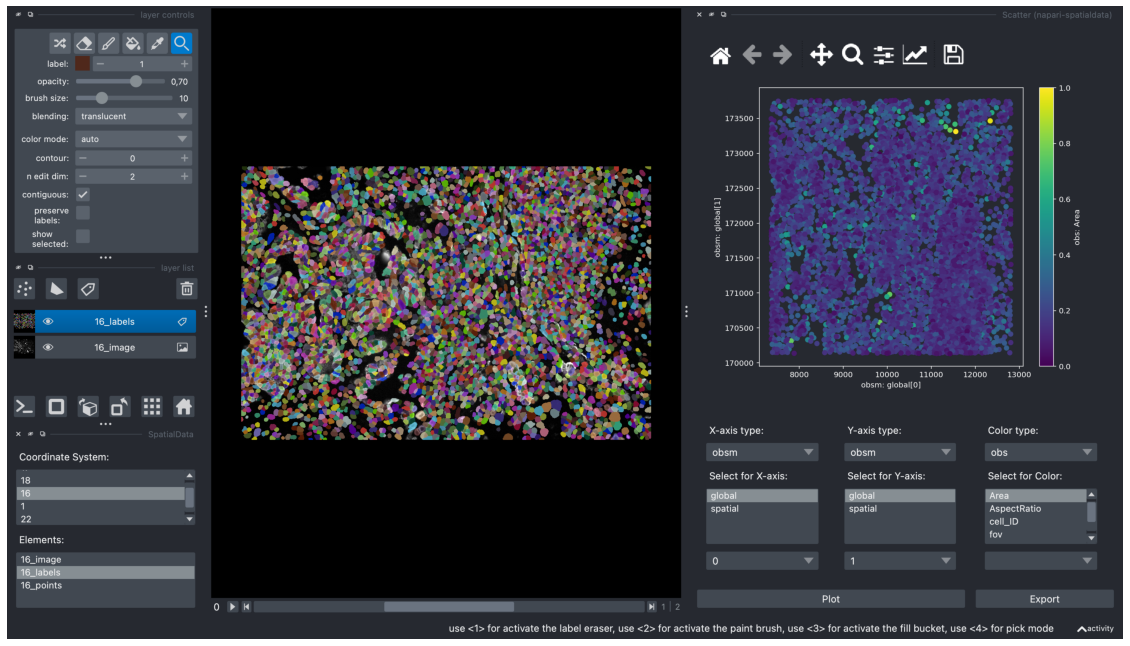

In [4]:
plt.imshow(interactive.screenshot())
plt.axis('off')

The "Scatter" widget also offers an interactive feature to manually select clusters of interest.

In the example below, we used our mouse cursor to select a cluster on the top left area of the scatterplot. The selected points is less transparent than the non-selected points.

(-0.5, 2939.5, 1665.5, -0.5)

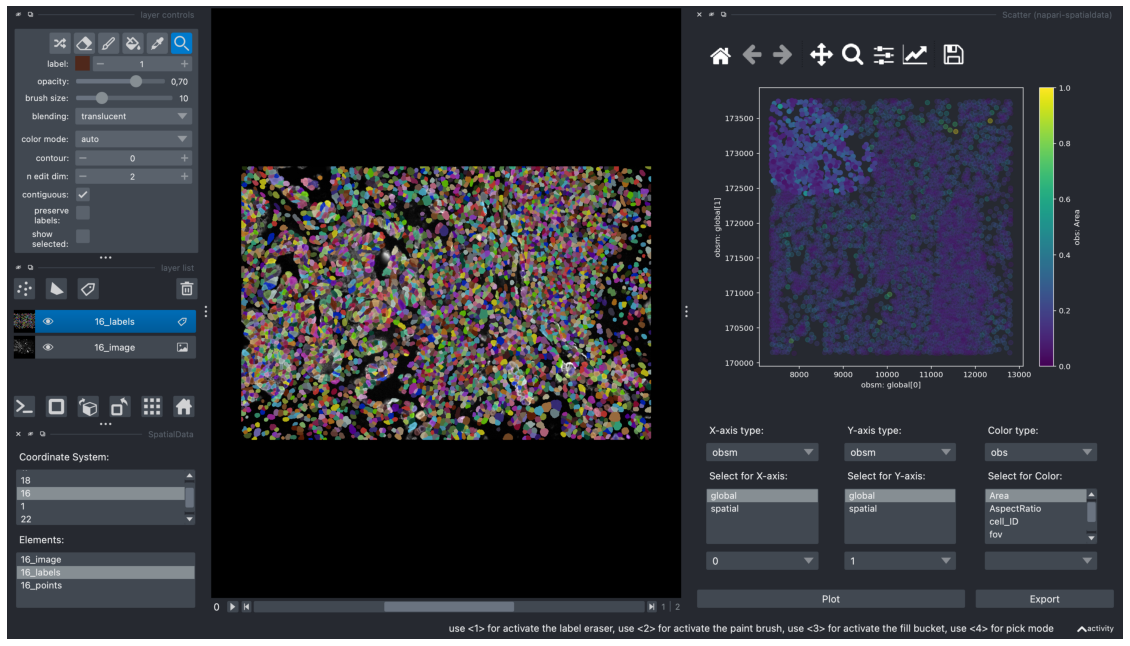

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_scatterwidgets.py:96: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_name] = self.exported_data
/opt/homebrew/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
2023-04-18 11:23:43.675 | INFO     | napari_spatialdata._scatterwidgets:export:97 - Exported selected coordinates to obs in AnnData as: 16_labels_LASSO_SELECTED
2023-04-18 11:23:59.053 | DEBUG    | napari_spatialdata._utils:_get_categorical:132 - KEY: 16_labels_LASSO_SELECTED
2023-04-18 11:24:08.947 | INFO     | napari_spatialdata._scatterwidgets:plot:253 - Plotting coordinates.
*

In [5]:
plt.imshow(interactive.screenshot())
plt.axis('off')

After a cluster has been highlighted, it can be exported into AnnData by clicking on the "Export" button. This creates a new obs value, with the suffix "_LASSO_SELECTED".

A new obs_value should be created called "16_labels_LASSO_SELECTED". We will use this as the color type for our scatterplot. The obs box isn't refreshed automatically so when selecting the color type, click on obsm and go back to obs. "16_labels_LASSO_SELECTED" should be visible as the first option. Use this to color the scatterplot.

(-0.5, 2939.5, 1665.5, -0.5)

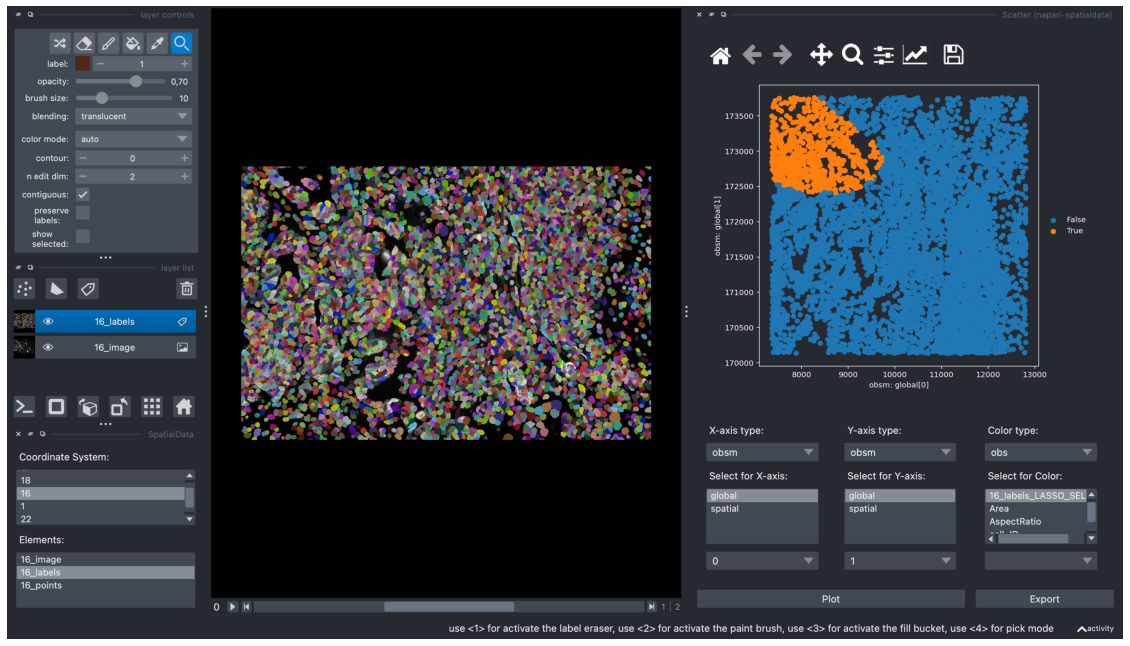

In [6]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We can also view this in the "View" widget and load it as a new layer. After closing this scatter widget and opening the "View" widget, we can see "16_labels_LASSO_SELECTED" in the top of "Observations".

(-0.5, 2939.5, 1857.5, -0.5)

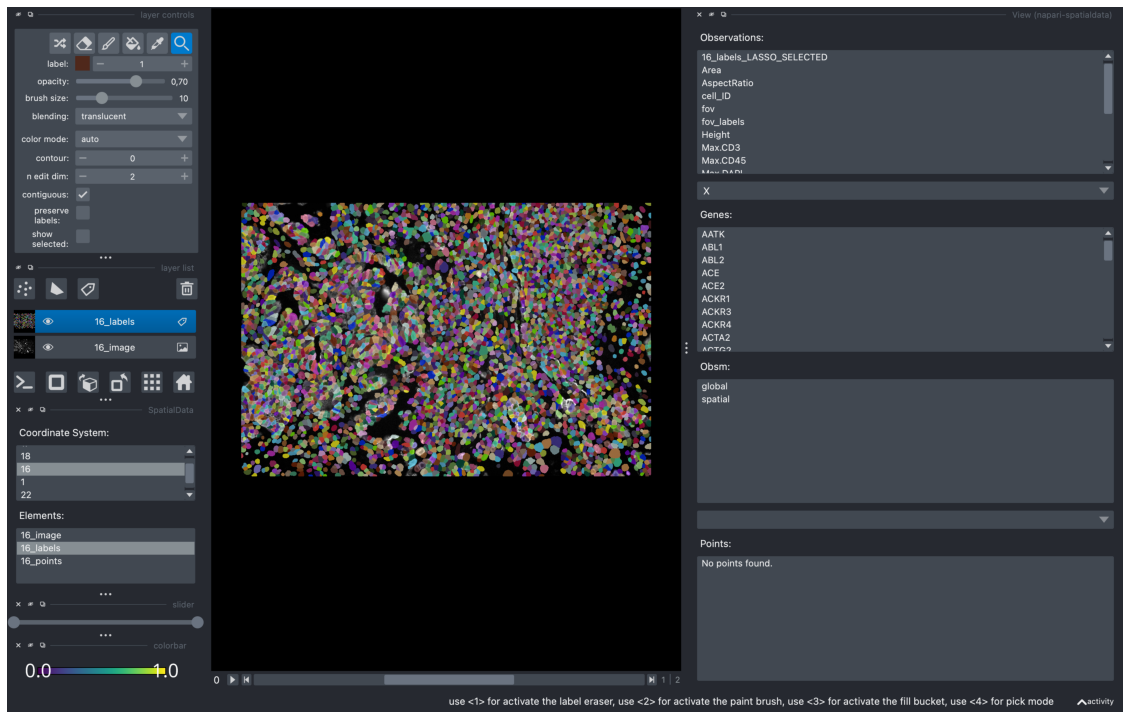

In [7]:
plt.imshow(interactive.screenshot())
plt.axis('off')

Clicking on "16_labels_LASSO_SELECTED" loads it as a new layer to the viewer.

(-0.5, 2939.5, 1857.5, -0.5)

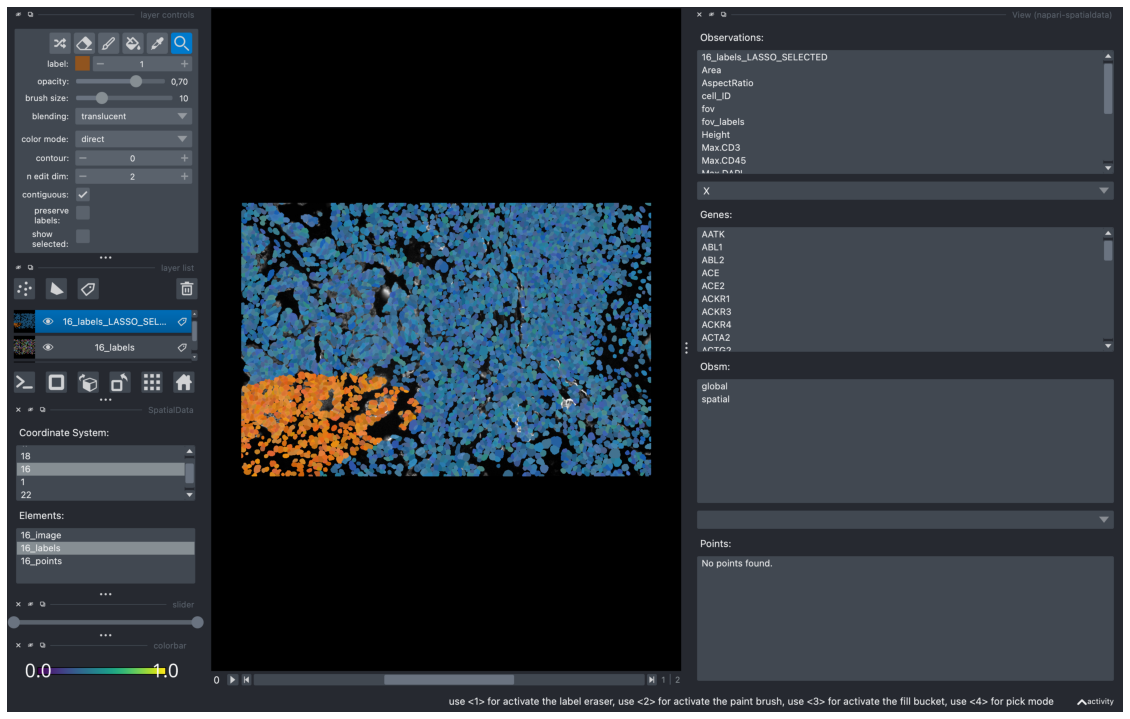

In [9]:
plt.imshow(interactive.screenshot())
plt.axis('off')

## Analysing Nanostring data in the Scatter Widget


In this section, we will analyse Nanostring data in a scatterplot with the Scatter Widget in napari-spatialdata.


Uncomment the lines below to download the dataset.

In [2]:
# !mkdir tutorial_data
# !mkdir tutorial_data/nanostring_data
# !wget -P tutorial_data/nanostring_data https://nanostring-public-share.s3.us-west-2.amazonaws.com/SMI-Compressed/Lung5_Rep2/Lung5_Rep2+SMI+Flat+data.tar.gz
# !tar -xzf tutorial_data/nanostring_data/Lung5_Rep2+SMI+Flat+data.tar.gz -C tutorial_data/nanostring_data/.

--2023-05-02 21:29:43--  https://nanostring-public-share.s3.us-west-2.amazonaws.com/SMI-Compressed/Lung5_Rep2/Lung5_Rep2+SMI+Flat+data.tar.gz
Resolving nanostring-public-share.s3.us-west-2.amazonaws.com (nanostring-public-share.s3.us-west-2.amazonaws.com)... 52.218.229.105, 52.92.229.234, 52.92.131.34, ...
Connecting to nanostring-public-share.s3.us-west-2.amazonaws.com (nanostring-public-share.s3.us-west-2.amazonaws.com)|52.218.229.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1631848310 (1,5G) [binary/octet-stream]
Saving to: ‘tutorial_data/nanostring_data/Lung5_Rep2+SMI+Flat+data.tar.gz’

Lung5_Rep2+SMI+Flat 100%[===================>]   1,52G  6,46MB/s    in 3m 15s  

2023-05-02 21:33:00 (7,98 MB/s) - ‘tutorial_data/nanostring_data/Lung5_Rep2+SMI+Flat+data.tar.gz’ saved [1631848310/1631848310]



Then, we use use Squidpy's reader to read the dataset into an AnnData object.

Note: If you get a `Key Error: 31` bug when trying to read the dataset, open the file, "Lung5_Rep2_fov_positions_file.csv" and delete the rows where fov is greater than 30. This is a bug with the dataset.

In [2]:
import squidpy as sq
from pathlib import Path

nanostring_dir = Path().resolve() / "tutorial_data" / "nanostring_data"
sample_dir = nanostring_dir / "Lung5_Rep2" / "Lung5_Rep2-Flat_files_and_images"

adata = sq.read.nanostring(
    path=sample_dir,
    counts_file="Lung5_Rep2_exprMat_file.csv",
    meta_file="Lung5_Rep2_metadata_file.csv",
    fov_file="Lung5_Rep2_fov_positions_file.csv",
)

Make the variable names unique using the method `anndata.var_names_make_unique`. Obtain the mitochondrial genes using their names prefixed with “mt-”. Calculate the quality control metrics on the anndata.AnnData using `scanpy.pp.calculate_qc_metrics`.

In [5]:
import scanpy as sc
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

You may have to install `scikit-misc package` for highly variable genes identification.

In [7]:
# !pip install scikit-misc

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 10.9 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.9 -m pip install --upgrade pip


Annotate the highly variable genes based on the count data by using `scanpy.pp.highly_variable_genes` with flavor="seurat_v3". Normalize counts per cell using `scanpy.pp.normalize_total`.

Logarithmize, do principal component analysis, compute a neighborhood graph of the observations using `scanpy.pp.log1p`, `scanpy.pp.pca` and `scanpy.pp.neighbors` respectively.

Use `scanpy.tl.umap` to embed the neighborhood graph of the data and cluster the cells into subgroups employing `scanpy.tl.leiden`.

In [8]:
adata.layers["counts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/opt/homebrew/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


We can now visualise an image from the dataset in the napari viewer. 

In [15]:
import napari

viewer = napari.Viewer()
img1 = adata.uns["spatial"]["1"]["images"]["hires"].copy()

viewer.add_image(
    img1,
    rgb=True,
    name="image1",
    colormap="inferno",
    metadata={"adata": adata},
    scale=(1, 1),
)

viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"

napari.run()

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:107: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-05-03 12:46:37.221 | DEBUG    | napari_spatialdata._utils:_get_categorical:132 - KEY: leiden
2023-05-03 12:46:38.015 | INFO     | napari_spatialdata._scatterwidgets:plot:253 - Plotting coordinates.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y

(-0.5, 2559.5, 1425.5, -0.5)

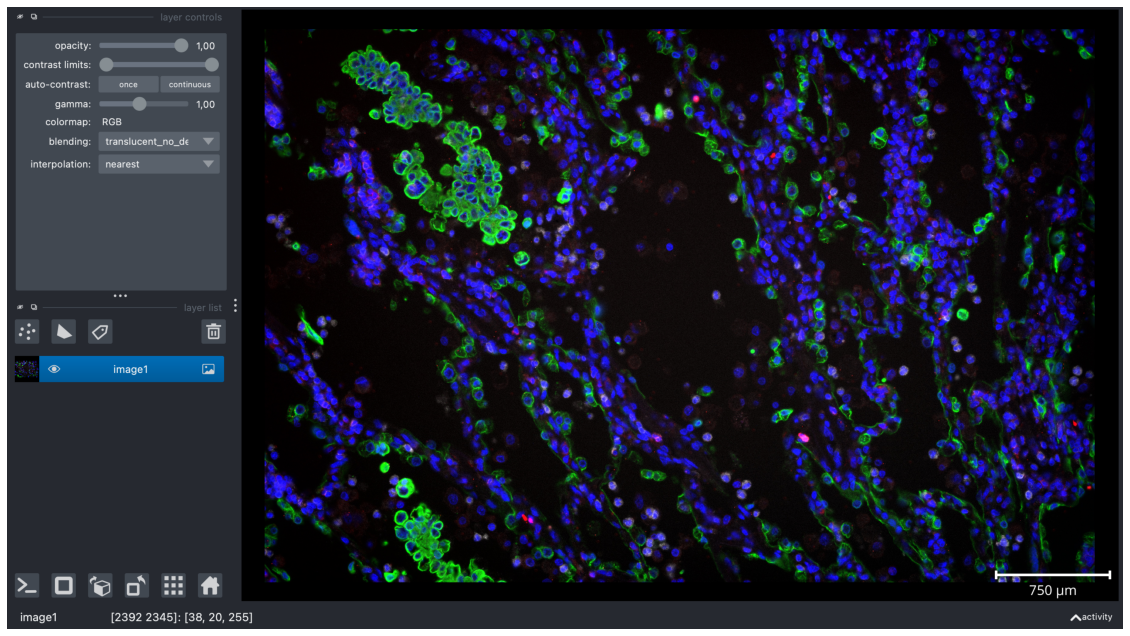

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current


In [11]:
plt.imshow(viewer.screenshot(canvas_only=False))
plt.axis('off')

Then, we open the ScatterWidget by using the menu bar and go to Plugins > napari-spatialdata > Scatter. 

(-0.5, 2559.5, 1425.5, -0.5)

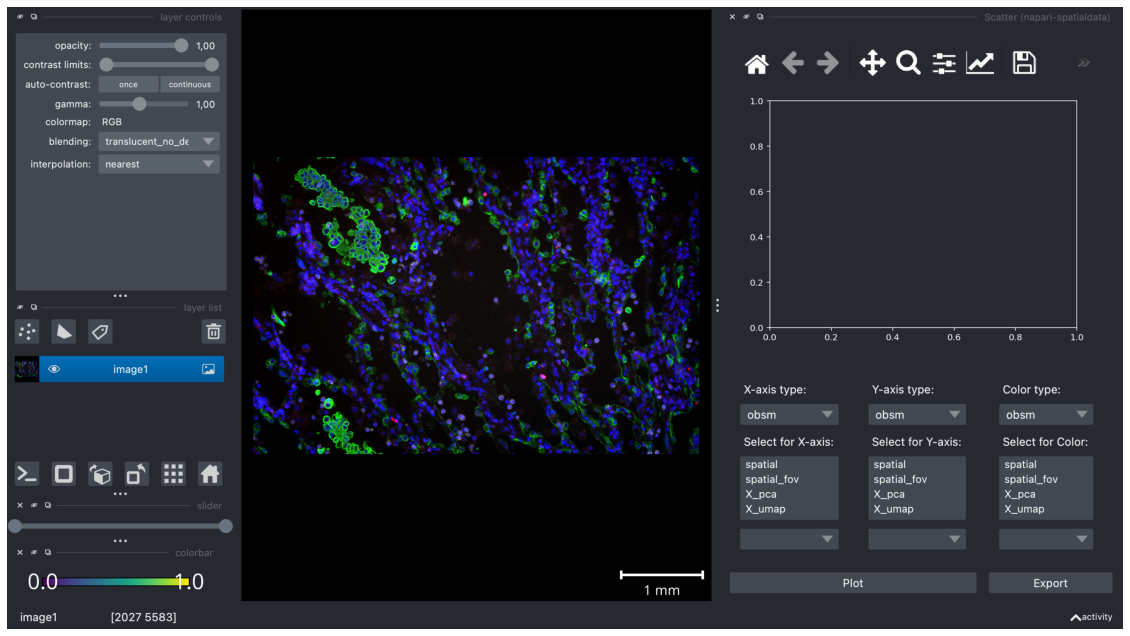

2023-05-03 12:33:43.176 | DEBUG    | napari_spatialdata._utils:_get_categorical:132 - KEY: leiden
2023-05-03 12:33:43.952 | INFO     | napari_spatialdata._scatterwidgets:plot:253 - Plotting coordinates.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & 

In [13]:
plt.imshow(viewer.screenshot(canvas_only=False))
plt.axis('off')

Then, as previously, we can now pick specific x-axis, y-axis and color values to visualise in the scatterplot. In the example below, we're visualising the UMAP (Uniform Manifold Approximation and Projection) coordinates of two different axes and coloring it with clusters created using the Leiden algorithm.

(-0.5, 2559.5, 1425.5, -0.5)

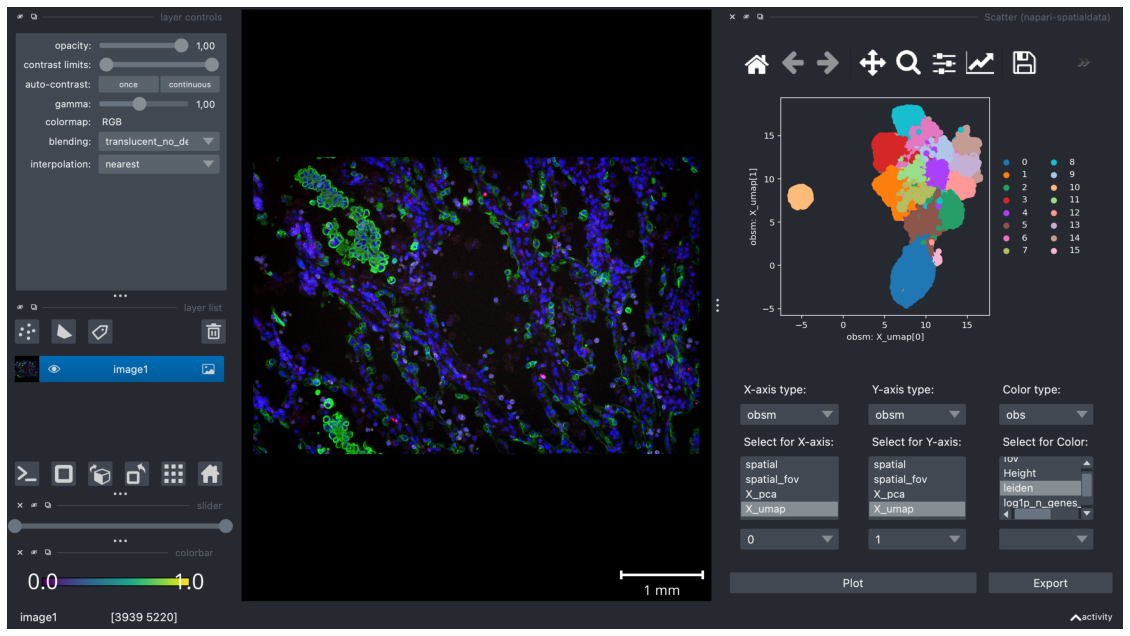

2023-05-03 12:42:38.842 | INFO     | napari_spatialdata._scatterwidgets:export:97 - Exported selected coordinates to obs in AnnData as: image1_LASSO_SELECTED
2023-05-03 12:45:57.022 | INFO     | napari_spatialdata._scatterwidgets:export:97 - Exported selected coordinates to obs in AnnData as: image1_LASSO_SELECTED
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/napari/_qt/menus/plugins_menu.py", line 99, in _add_toggle_widget
    self._win.add_plugin_dock_widget(*key)
  File "/opt/homebrew/lib/python3.9/site-packages/napari/_qt/qt_main_window.py", line 717, in add_plugin_dock_widget
    wdg = _instantiate_dock_widget(
  File "/opt/homebrew/

In [14]:
plt.imshow(viewer.screenshot(canvas_only=False))
plt.axis('off')

After plotting, as mentioned in the previous sections, it is possible to interactively select clusters and export it to AnnData.

In the example below, we used the cursor to select the left most cluster (value of 10). We clicked on the "Export" button, opened the View widget, and double clicked on  image_1_LASSO_SELECTED under "Observations:"

(-0.5, 2559.5, 1425.5, -0.5)

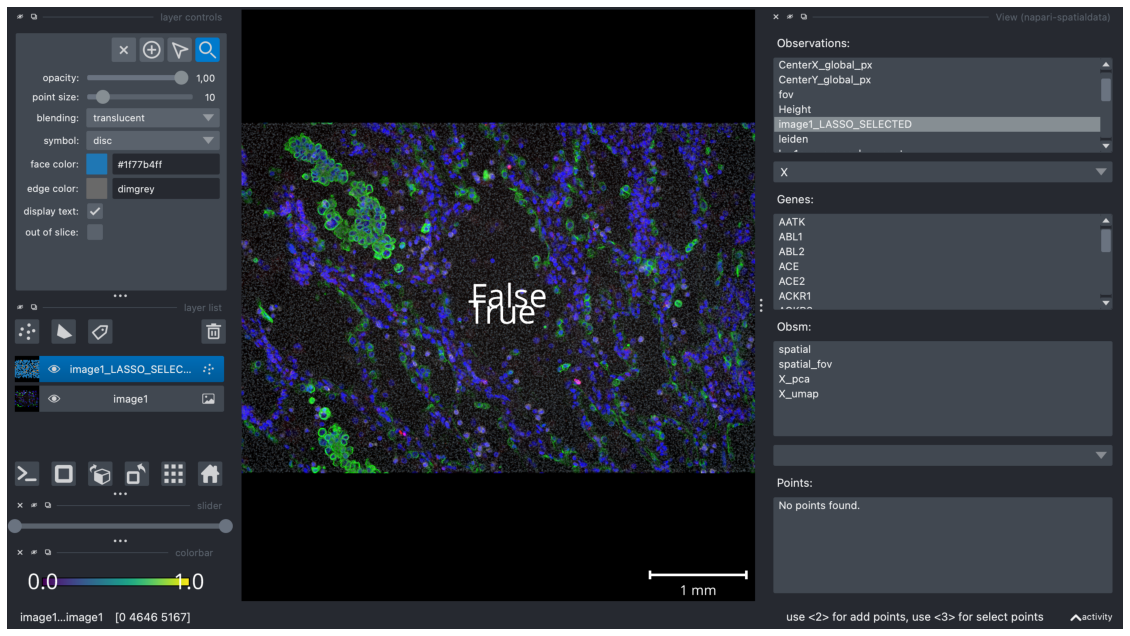

In [18]:
plt.imshow(viewer.screenshot(canvas_only=False))
plt.axis('off')

A zoomed up version of the screenshot where the points are clearer.

(-0.5, 2559.5, 1425.5, -0.5)

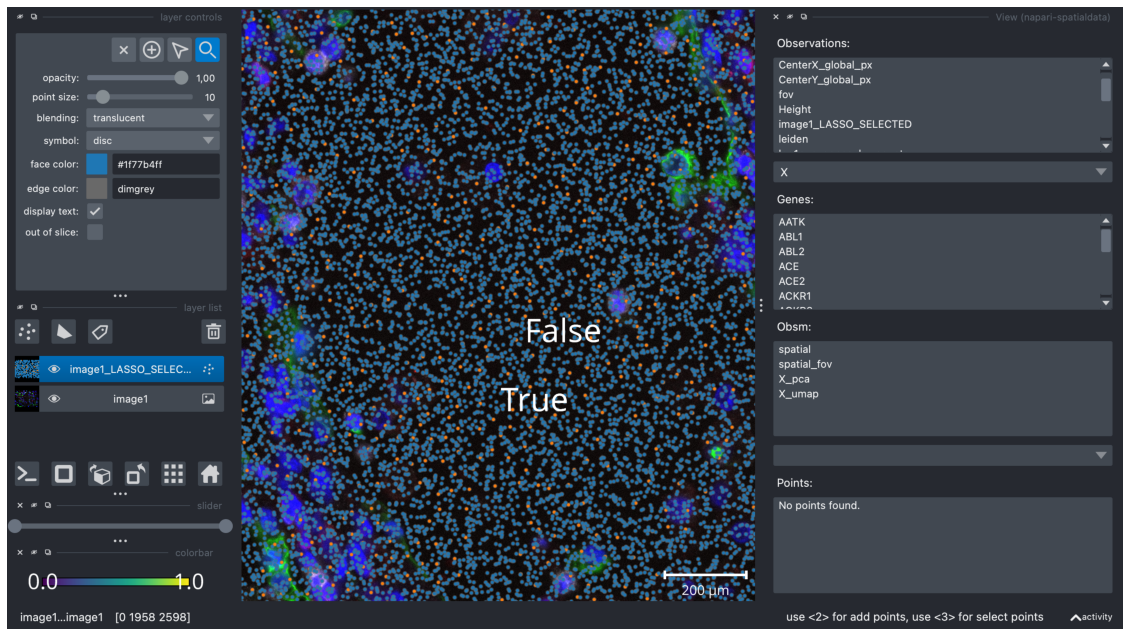

In [17]:
plt.imshow(viewer.screenshot(canvas_only=False))
plt.axis('off')